# Домашнее задание

**1. Загрузить файл 'telecom_churn.csv'.**

In [130]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

df = pd.read_csv('telecom_churn.csv')
df


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


**2. Проверить данные на наличие пропусков и выбросов. Обработать пропуски и выбросы.**

In [131]:
print(df.isnull().sum())

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


In [132]:
df = df.drop('phone number', axis=1)

In [133]:
Q1 = df['total day minutes'].quantile(0.25)
Q3 = df['total day minutes'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['total day minutes'] < (Q1 - 1.5 * IQR)) | (df['total day minutes'] > (Q3 + 1.5 * IQR)))]

df

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


**3. Выполнить кодирование категориальных переменных.**

In [134]:
le = LabelEncoder()
df['international plan'] = le.fit_transform(df['international plan'])
df['voice mail plan'] = le.fit_transform(df['voice mail plan'])
df['churn'] = le.fit_transform(df['churn'])

In [135]:
df = pd.get_dummies(df, columns=['state'])

**4. Выполнить масштабирование признаков.**

In [136]:
X = df.drop('churn', axis=1)
y = df['churn']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

**5. Построить модели k-ближайших соседей, Дерево решений, SVM**

In [138]:
models = {
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC()}

a. Обучить модель и вывести на экран значения метрик.

In [139]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = classification_report(y_test, y_pred, output_dict=True)
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       838
           1       0.70      0.05      0.08       155

    accuracy                           0.85       993
   macro avg       0.77      0.52      0.50       993
weighted avg       0.83      0.85      0.79       993


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       838
           1       0.70      0.67      0.69       155

    accuracy                           0.90       993
   macro avg       0.82      0.81      0.82       993
weighted avg       0.90      0.90      0.90       993


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       838
           1       0.77      0.06      0.12       155

    accuracy                           0.85       993
   macro avg       0.81      0.53 

b. Подобрать значение параметров модели по кросс-валидации, используя GridSearchCV.

In [140]:
param_grid = {
    'KNN': {'n_neighbors': [3, 5, 7]},
    'Decision Tree': {'max_depth': [None, 5, 10]},
    'SVM': {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}
}

best_models = {}
for name, model in models.items():
    grid = GridSearchCV(model, param_grid[name], cv=5)
    grid.fit(X_train, y_train)
    best_models[name] = grid.best_estimator_
    print(f"\nBest parameters for {name}: {grid.best_params_}")


Best parameters for KNN: {'n_neighbors': 5}

Best parameters for Decision Tree: {'max_depth': 5}

Best parameters for SVM: {'C': 0.1, 'gamma': 0.1}


In [141]:
best_results = {}
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    best_results[name] = classification_report(y_test, y_pred, output_dict=True)
    print(f"\nBest {name} Classification Report:")
    print(classification_report(y_test, y_pred))


Best KNN Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       838
           1       0.70      0.05      0.08       155

    accuracy                           0.85       993
   macro avg       0.77      0.52      0.50       993
weighted avg       0.83      0.85      0.79       993


Best Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       838
           1       0.86      0.65      0.74       155

    accuracy                           0.93       993
   macro avg       0.90      0.82      0.85       993
weighted avg       0.93      0.93      0.92       993


Best SVM Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.92       838
           1       0.00      0.00      0.00       155

    accuracy                           0.84       993
   macro avg       

D:\PYTHON\PythonProject2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\PYTHON\PythonProject2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\PYTHON\PythonProject2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\PYTHON\PythonProjec

**6. Сравнить полученные результаты по метрикам accuracy, precision, recall, f1-score.**

In [142]:
metrics = ['accuracy', 'precision', 'recall', 'f1-score']
comparison = pd.DataFrame(index=models.keys(), columns=metrics)
for name in models.keys():
    comparison.loc[name] = [
        best_results[name]['accuracy'],
        best_results[name]['weighted avg']['precision'],
        best_results[name]['weighted avg']['recall'],
        best_results[name]['weighted avg']['f1-score']
    ]
print("\nСравнение метрик:")
print(comparison)


Сравнение метрик:
               accuracy precision    recall  f1-score
KNN            0.847936  0.826114  0.847936  0.787174
Decision Tree  0.928499  0.925431  0.928499  0.924426
SVM            0.843907   0.71218  0.843907  0.772468


**7. Выделить наилучшую модель.**

In [143]:
best_model_name = comparison['f1-score'].idxmax()
print(f"\nНаилучшая модель: {best_model_name}")


Наилучшая модель: Decision Tree


**8. Визуализировать результаты с помощью ConfusionMatrix.**

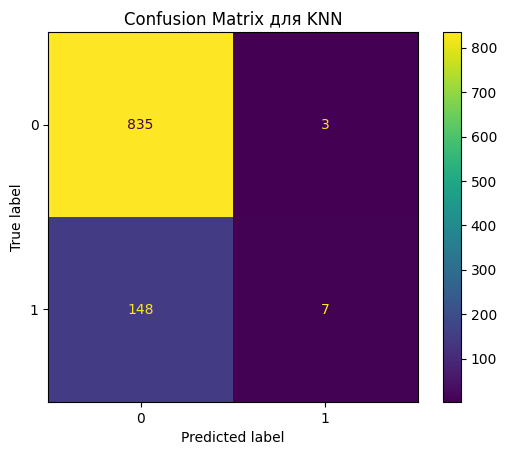

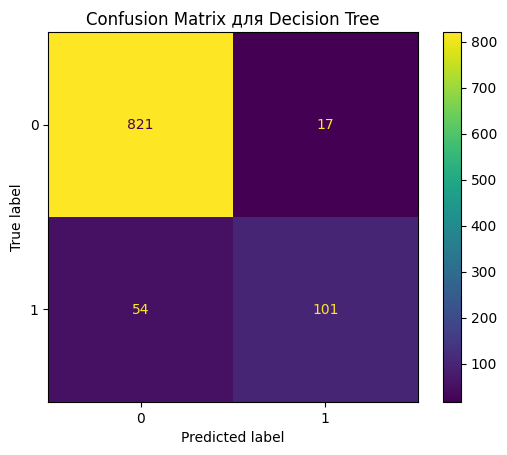

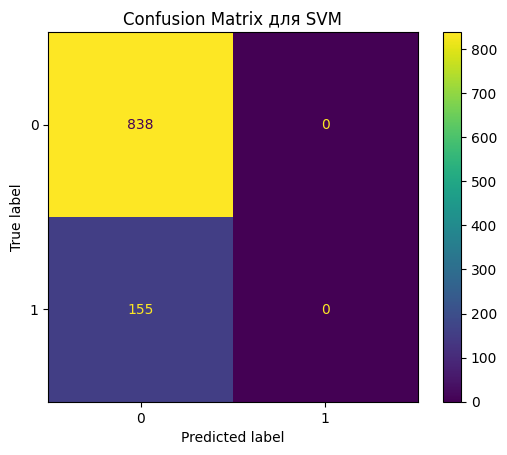

In [144]:
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f'Confusion Matrix для {name}')
    plt.show()